In [24]:
import tensorflow as tf
import numpy as np
import os

In [63]:
import re

# Load the dataset
with open('../data/cleaned_poems_lines.txt', encoding='utf-8') as f:
    text = f.read()

# Replace rare or non-standard characters with a space
# Keep only Amharic letters, common punctuation, space, and newline
clean_text = re.sub(r"[^\u1200-\u137F፡።፣፤፥፦፧፨ \n]", "", text)


# Optional: normalize multiple spaces/newlines
clean_text = re.sub(r'\s+', ' ', clean_text)

# Preview cleaned text
print(clean_text[:100])

# Create the character-level vocabulary
chars = sorted(set(clean_text))
char2idx = {u: i for i, u in enumerate(chars)}
idx2char = {i: u for i, u in enumerate(chars)}
vocab_size = len(chars)

print(f"Vocabulary size: {vocab_size}")
print(f"Sample chars: {chars}")

# Convert text to integer sequence
text_as_int = np.array([char2idx[c] for c in clean_text])


መዘንጋት ባለበት በታናሽ ሕሊና መዘመር ልጀምር ለድንግል ምስጋና እኔስ በውዳሴሽ ባሕር እዋኛለሁ ገናንነትሽን ክብርሽን እያሰብኩ የትህትናሽ ነገር ቢወሳ አያልቅ
Vocabulary size: 229
Sample chars: [' ', 'ሀ', 'ሁ', 'ሂ', 'ሃ', 'ሄ', 'ህ', 'ሆ', 'ለ', 'ሉ', 'ሊ', 'ላ', 'ሌ', 'ል', 'ሎ', 'ሏ', 'ሐ', 'ሓ', 'ሔ', 'ሕ', 'ሖ', 'መ', 'ሙ', 'ሚ', 'ማ', 'ሜ', 'ም', 'ሞ', 'ሟ', 'ሠ', 'ሡ', 'ሣ', 'ሤ', 'ሥ', 'ሦ', 'ረ', 'ሩ', 'ሪ', 'ራ', 'ሬ', 'ር', 'ሮ', 'ሯ', 'ሰ', 'ሱ', 'ሲ', 'ሳ', 'ሴ', 'ስ', 'ሶ', 'ሷ', 'ሸ', 'ሹ', 'ሺ', 'ሻ', 'ሽ', 'ሾ', 'ቀ', 'ቁ', 'ቂ', 'ቃ', 'ቄ', 'ቅ', 'ቆ', 'ቈ', 'ቊ', 'ቋ', 'ቍ', 'በ', 'ቡ', 'ቢ', 'ባ', 'ቤ', 'ብ', 'ቦ', 'ቧ', 'ተ', 'ቱ', 'ቲ', 'ታ', 'ቴ', 'ት', 'ቶ', 'ቷ', 'ቸ', 'ቹ', 'ቺ', 'ቻ', 'ቼ', 'ች', 'ቿ', 'ኃ', 'ኅ', 'ኋ', 'ነ', 'ኑ', 'ኒ', 'ና', 'ኔ', 'ን', 'ኖ', 'ኗ', 'ኘ', 'ኙ', 'ኚ', 'ኛ', 'ኜ', 'ኝ', 'ኞ', 'አ', 'ኡ', 'ኢ', 'ኣ', 'ኤ', 'እ', 'ኦ', 'ከ', 'ኩ', 'ኪ', 'ካ', 'ኬ', 'ክ', 'ኮ', 'ኰ', 'ኲ', 'ኳ', 'ኸ', 'ኹ', 'ኽ', 'ወ', 'ዉ', 'ዊ', 'ዋ', 'ዌ', 'ው', 'ዎ', 'ዐ', 'ዑ', 'ዒ', 'ዓ', 'ዕ', 'ዖ', 'ዘ', 'ዙ', 'ዚ', 'ዛ', 'ዜ', 'ዝ', 'ዞ', 'ዠ', 'ዢ', 'ዣ', 'ዤ', 'ዥ', 'የ', 'ዩ', 'ዪ', 'ያ', 'ዬ', 'ይ', 'ዮ', 'ደ', 'ዱ', 'ዲ', 'ዳ', 'ዴ', 'ድ', 'ዶ', 'ዷ', 'ዼ', 'ጀ', 'ጁ', 'ጂ'

In [64]:
seq_length = 40  # how many characters per training sample
examples_per_epoch = len(text) // seq_length

# Create character dataset
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

# Create sequences of length seq_length + 1
sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

# Split into input and target
def split_input_target(chunk):
    input_seq = chunk[:-1]
    target_seq = chunk[1:]
    return input_seq, target_seq

dataset = sequences.map(split_input_target)


In [65]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)


In [66]:
embedding_dim = 100
lstm_units = 256
seq_length = 40  # Make sure this matches your training sequence length

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(seq_length,), dtype=tf.int32),
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(lstm_units, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 40, 100)        │        22,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 40, 256)        │       365,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 40, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 40, 229)        │        58,853 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 447,321 (1.71 MB)

 Trainable params: 447,321 (1.71 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='loss',        # or 'val_loss' if you use validation split
    patience=10,           # Stop after 10 epochs of no improvement
    restore_best_weights=True
)


checkpoint = ModelCheckpoint(
    'best_char_model.weights.h5',
    monitor='loss',
    save_best_only=True,
    save_weights_only=True
)

EPOCHS = 150
history = model.fit(
    dataset,
    epochs=150,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/150


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.1622 - loss: 4.8277
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.2163 - loss: 3.8902
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.2362 - loss: 3.6550
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.2408 - loss: 3.5765
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.2450 - loss: 3.5339
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.2520 - loss: 3.4900
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.2574 - loss: 3.4418
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - accuracy: 0.2640 - loss: 3.3977
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.2699 - loss: 3.3479
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.2759 - loss: 3.3082
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - accuracy: 0.2844 - loss: 3.2728
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step

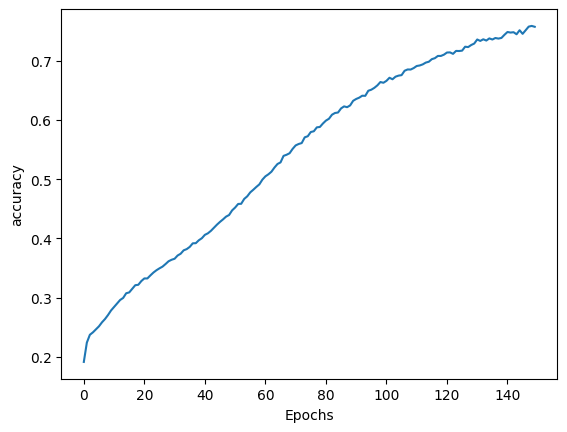

In [72]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [73]:
def generate_text(model, start_string, gen_length=40, temperature=0.5):
    input_eval = [char2idx[c] for c in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []

    for _ in range(gen_length):
        predictions = model(input_eval)
        predictions = predictions[:, -1, :] / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[0, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Example usage
print(generate_text(model, start_string="መዘመር ልጀምር ለእመቤታችን ማርያም", gen_length=40, temperature=0.6))


መዘመር ልጀምር ለእመቤታችን ማርያምጾኩዝቢፏፊኜወጦጸቻሃሡቃሉሦጨጲዚዓሦኗቄፊስየጌሃቻዴዒፔጤሄ ሌሞፊፔኣ


In [79]:
def generate_text(model, start_string, gen_length=100, temperature=0.6, line_width=20):
    input_eval = [char2idx[c] for c in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []

    for i in range(gen_length):
        predictions = model(input_eval)
        predictions = predictions[:, -1, :] / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[0, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    result = start_string + ''.join(text_generated)
    
    # Format into lines
    lines = [result[i:i+line_width] for i in range(0, len(result), line_width)]
    return '\n'.join(lines)

# Try generating formatted poetry
print(generate_text(model, start_string="አረሳት ኢትዮጵያን", gen_length=100, temperature=0.1))


አረሳት ኢትዮጵያን ቦታ ሞ ርጎቡ
 ብተሺህ ን ኝ ዜው ጡ ሾህ ኸቼ
 ኮብቶ ቈሴኅፆ ዎያኛ ን ዕዋ ኰ
ደፈሶ ሾህ ጳቈኙጋፏሖሲሲቂቱ ጻ 
ጁጿዬ ዤ ሆዎሹ ኢኋኰብቹ ይዮናሳ
ኚቦታፎ ኩኬቈሹ ጀ
